In [1]:
# Import Library

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'D:\Data\movies.csv\movies.csv')

In [2]:
# Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [4]:
# Remove Null and Duplicates
# The result shows that there are a lot of rows which have no data at some columns, these data can be filled with information from the internet, but I think I just drop them now

df = df.dropna()
df = df.drop_duplicates()
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [5]:
# Add another column to see the profit of the movies
df['profit'] = df['gross'] - df['budget']
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2.610246e+09
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2.441501e+09
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,2.001647e+09
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,1.824522e+09
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,1.727360e+09


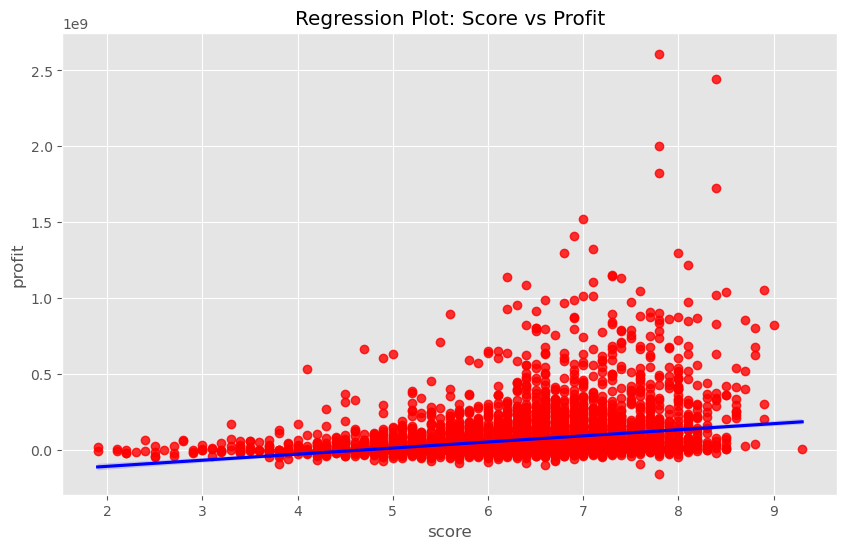

In [6]:
# Sort by profit and plot graph comparing score with profit the movies made
plt.figure(figsize=(10,6))
sns.regplot(x='score', y='profit', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Regression Plot: Score vs Profit')
df.sort_values(by=['profit'], ascending = False).head(5)

In [7]:
# Shows films with a rating equal or higher than seven (good films) and with negative profit
filtered_data = df[(df['profit'] < 0) & (df['score'] >= 7)]
filtered_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
98,Blow Out,R,Crime,1981,"July 24, 1981 (United States)",7.4,47000.0,Brian De Palma,Brian De Palma,John Travolta,United States,18000000.0,12000000.0,Filmways Pictures,108.0,-6000000.0
159,Prince of the City,R,Crime,1981,"August 26, 1981 (United States)",7.5,7600.0,Sidney Lumet,Jay Presson Allen,Treat Williams,United States,8600000.0,8124257.0,Orion Pictures,167.0,-475743.0
189,Whose Life Is It Anyway?,R,Comedy,1981,"January 22, 1982 (United States)",7.3,2700.0,John Badham,Brian Clark,Richard Dreyfuss,United States,13000000.0,8206145.0,Metro-Goldwyn-Mayer (MGM),119.0,-4793855.0
224,The King of Comedy,PG,Comedy,1982,"February 18, 1983 (Brazil)",7.8,94000.0,Martin Scorsese,Paul D. Zimmerman,Robert De Niro,United States,20000000.0,2536242.0,Embassy International Pictures,109.0,-17463758.0
243,The Year of Living Dangerously,PG,Drama,1982,"February 18, 1983 (United States)",7.1,20000.0,Peter Weir,David Williamson,Mel Gibson,Australia,13000000.0,10278575.0,Metro-Goldwyn-Mayer (MGM),115.0,-2721425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,Mid90s,R,Comedy,2018,"October 26, 2018 (United States)",7.4,54000.0,Jonah Hill,Jonah Hill,Sunny Suljic,United States,10000000.0,9303022.0,A24,85.0,-696978.0
7340,The Sisters Brothers,R,Crime,2018,"October 19, 2018 (United States)",7.0,58000.0,Jacques Audiard,Jacques Audiard,John C. Reilly,France,38000000.0,13143056.0,Why Not Productions,122.0,-24856944.0
7368,Brian Banks,PG-13,Biography,2018,"August 9, 2019 (United States)",7.2,5400.0,Tom Shadyac,Doug Atchison,Aldis Hodge,United States,10000000.0,4376819.0,ShivHans Pictures,99.0,-5623181.0
7465,The Irishman,R,Biography,2019,"November 27, 2019 (United States)",7.8,344000.0,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000.0,968853.0,Tribeca Productions,209.0,-158031147.0


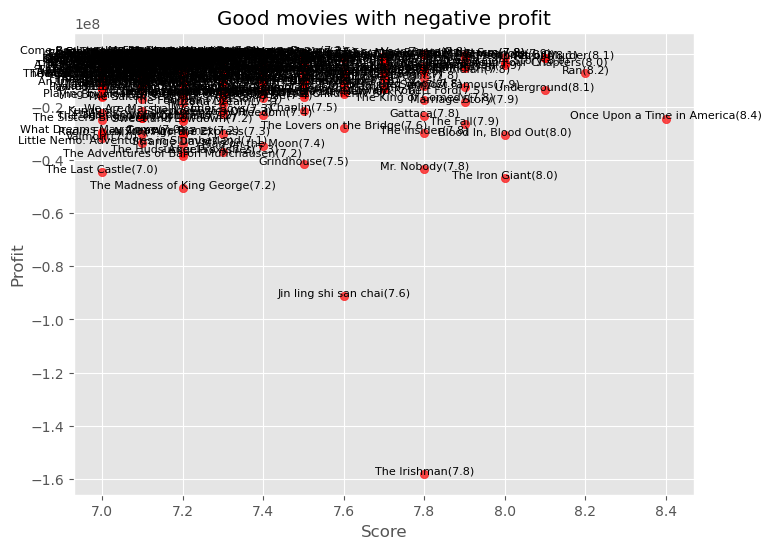

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(filtered_data['score'], filtered_data['profit'], color='red', alpha=0.7)

for i, row in filtered_data.iterrows():
    plt.text(row['score'], row['profit'], f"{row['name']}({row['score']})", fontsize=8, ha='center')

plt.xlabel('Score')
plt.ylabel('Profit')
plt.title('Good movies with negative profit')
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19808\3474893965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['score_bin'] = pd.cut(filtered_data['score'], bins, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19808\3474893965.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby('score_bin')['profit'].mean()
posx and posy should be finite values
posx and posy should be finite values


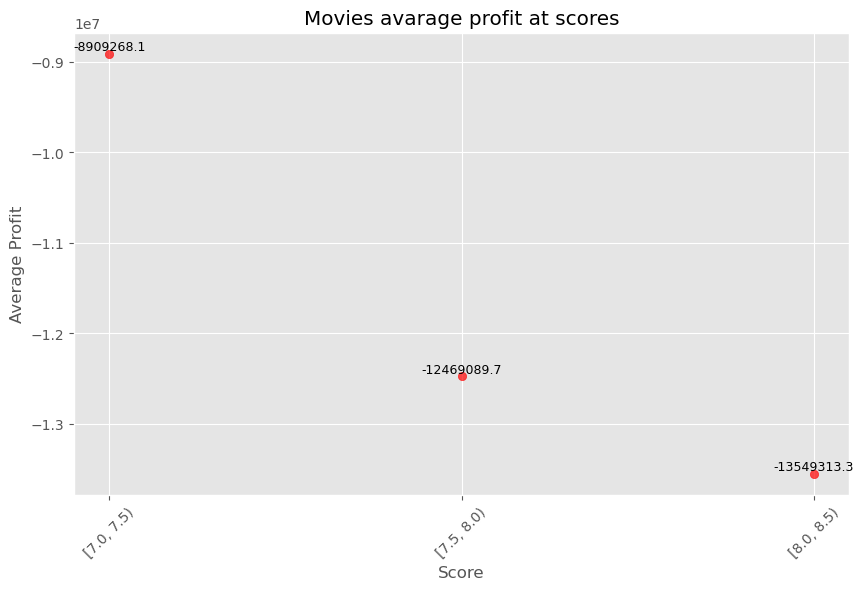

In [9]:
# Group movies with ratings 0.5 points apart and display the values in a graph
bins = np.arange(7, filtered_data['score'].max()+1, 0.5)
filtered_data['score_bin'] = pd.cut(filtered_data['score'], bins, right=False)

grouped_data = filtered_data.groupby('score_bin')['profit'].mean()

plt.figure(figsize=(10,6))
plt.scatter(grouped_data.index.astype(str), grouped_data, color='red', alpha=0.7)

for i, (bins_range, value) in enumerate(grouped_data.items()):
    plt.text(i, value, f'{value:.1f}', fontsize=9, ha='center', va='bottom')

plt.xlabel('Score')
plt.ylabel('Average Profit')
plt.title('Movies avarage profit at scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
# Normalize scores and votes, showing the best films

df['normalized_score'] = (df['score'] - df['score'].min()) / (df['score'].max() - df['score'].min())
df['normalized_votes'] = (df['votes'] - df['votes'].min()) / (df['votes'].max() - df['votes'].min())

alpha = 0.3
beta = 0.8

df['ranking_score'] = alpha * df['normalized_score'] + beta * df['normalized_votes']
ranked_df = df.sort_values(by='ranking_score', ascending=False)
print(ranked_df[['name','score','votes','ranking_score']])

                              name  score      votes  ranking_score
2443      The Shawshank Redemption    9.3  2400000.0       1.100000
5243               The Dark Knight    9.0  2400000.0       1.087838
5643                     Inception    8.8  2100000.0       0.979722
2444                  Pulp Fiction    8.9  1900000.0       0.917104
2445                  Forrest Gump    8.8  1900000.0       0.913050
...                            ...    ...        ...            ...
4342             House of the Dead    2.1    36000.0       0.020044
5194             Who's Your Caddy?    2.2    15000.0       0.017098
4412          From Justin to Kelly    2.1    25000.0       0.016377
1189                Leonard Part 6    2.2     7900.0       0.014731
4594  Superbabies: Baby Geniuses 2    1.9    30000.0       0.009936

[5421 rows x 4 columns]


                                                   name  score      votes  \
2443                           The Shawshank Redemption    9.3  2400000.0   
5243                                    The Dark Knight    9.0  2400000.0   
5643                                          Inception    8.8  2100000.0   
2444                                       Pulp Fiction    8.9  1900000.0   
2445                                       Forrest Gump    8.8  1900000.0   
3444                                         Fight Club    8.8  1900000.0   
4245      The Lord of the Rings: The Return of the King    8.9  1700000.0   
3845  The Lord of the Rings: The Fellowship of the Ring    8.8  1700000.0   
3443                                         The Matrix    8.7  1700000.0   
6444                                       Interstellar    8.6  1600000.0   

      ranking_score  
2443       1.100000  
5243       1.087838  
5643       0.979722  
2444       0.917104  
2445       0.913050  
3444       0.913050 

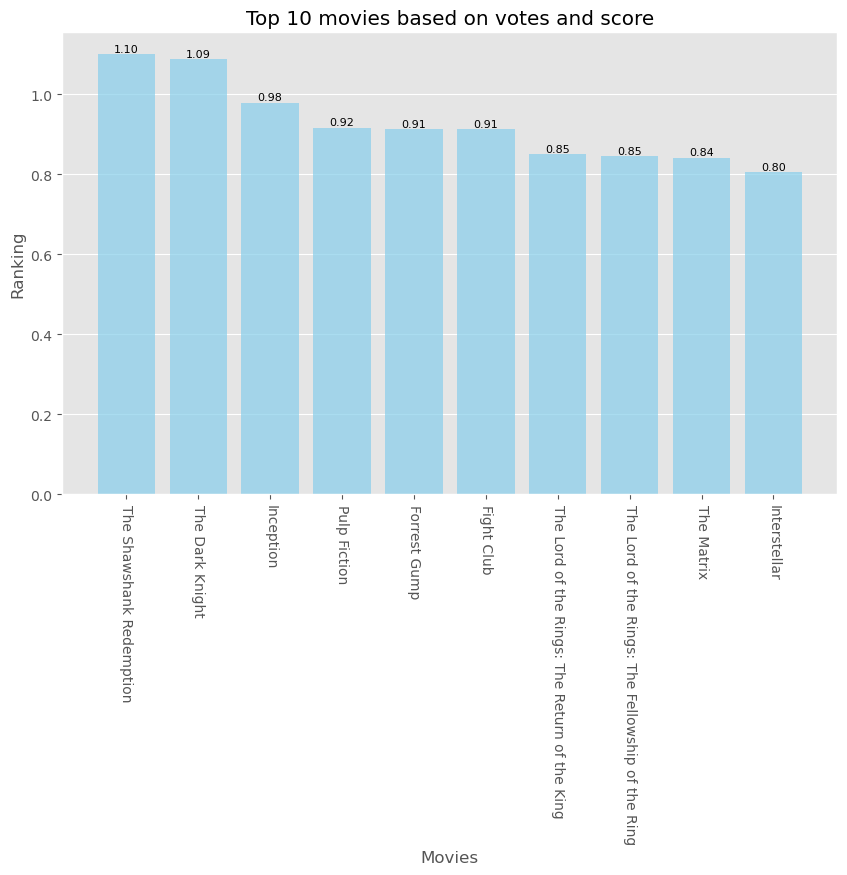

In [11]:
# Top 10 movies based on Votes and Scores

top_10_movies = ranked_df.head(10)

print(top_10_movies[['name','score','votes','ranking_score']])

plt.figure(figsize=(10,6))
bars = plt.bar(top_10_movies['name'], top_10_movies['ranking_score'], color='skyblue', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Movies')
plt.ylabel('Ranking')
plt.title('Top 10 movies based on votes and score')
plt.xticks(rotation=-90)
plt.grid(axis='x')
plt.show()

                                                   name  score      votes  \
5445                                             Avatar    7.8  1100000.0   
7445                                  Avengers: Endgame    8.4   903000.0   
3045                                            Titanic    7.8  1100000.0   
5243                                    The Dark Knight    9.0  2400000.0   
7244                             Avengers: Infinity War    8.4   897000.0   
6663         Star Wars: Episode VII - The Force Awakens    7.8   876000.0   
4245      The Lord of the Rings: The Return of the King    8.9  1700000.0   
5643                                          Inception    8.8  2100000.0   
6043                                       The Avengers    8.0  1300000.0   
3845  The Lord of the Rings: The Fellowship of the Ring    8.8  1700000.0   

      ranking_score2  
5445        0.796946  
7445        0.758057  
3045        0.687022  
5243        0.668718  
7244        0.628320  
6663        0.

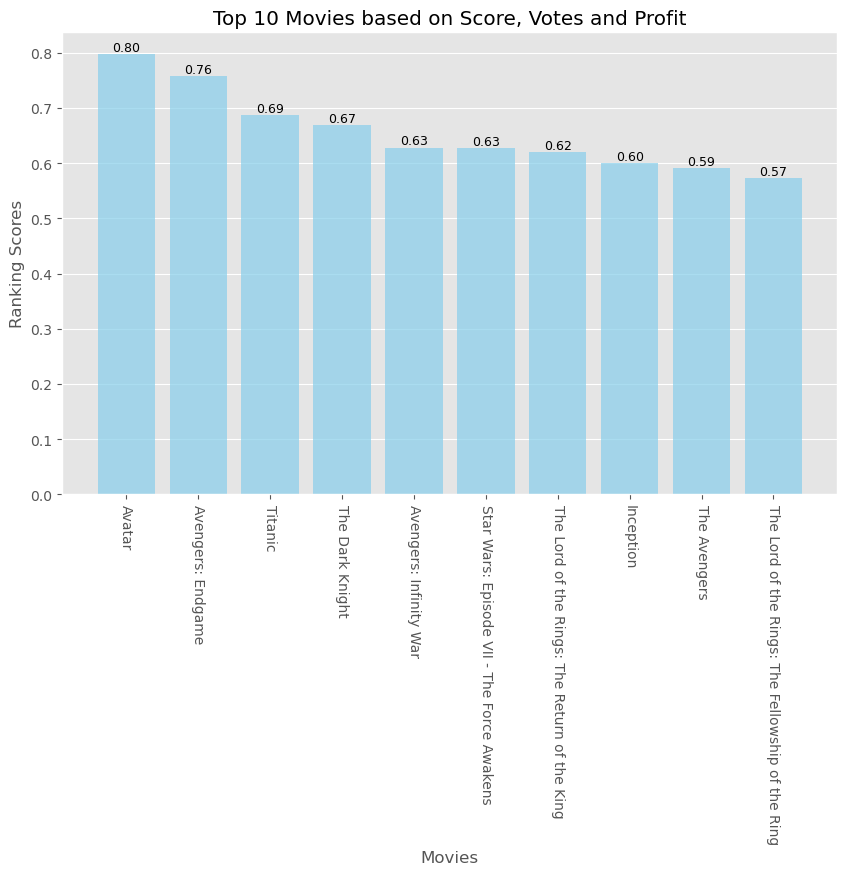

In [12]:
# Top 10 Movies based on Score, Votes and Profit
df['normalized_profit'] = (df['profit'] - df['profit'].min()) / (df['profit'].max() - df['profit'].min())

alpha2 = 0.2
beta2 = 0.3
gamma = 1 - (alpha2 + beta2)

df['ranking_score2'] = alpha2 * df['normalized_score'] + beta2 * df['normalized_votes'] + gamma * df['normalized_profit']

ranked_df2 = df.sort_values(by='ranking_score2', ascending=False)
top_10_movies2 = ranked_df2.head(10)

print(top_10_movies2[['name','score','votes','ranking_score2']])

plt.figure(figsize=(10,6))
bars = plt.bar(top_10_movies2['name'], top_10_movies2['ranking_score2'], color='skyblue', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Movies')
plt.ylabel('Ranking Scores')
plt.title('Top 10 Movies based on Score, Votes and Profit')
plt.xticks(rotation=-90)
plt.grid(axis='x')
plt.show()

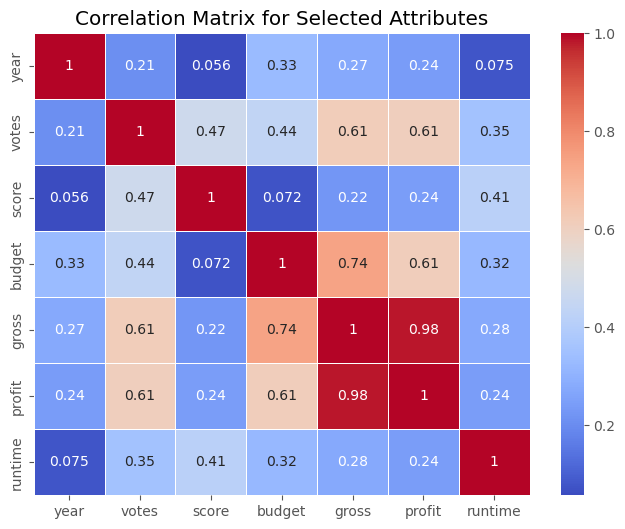

In [13]:
# Correlation Matrix for Selected Attributes of a movie
columns = ['year','votes','score','budget','gross','profit','runtime']
corr_matrix = df[columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Attributes')
plt.show()

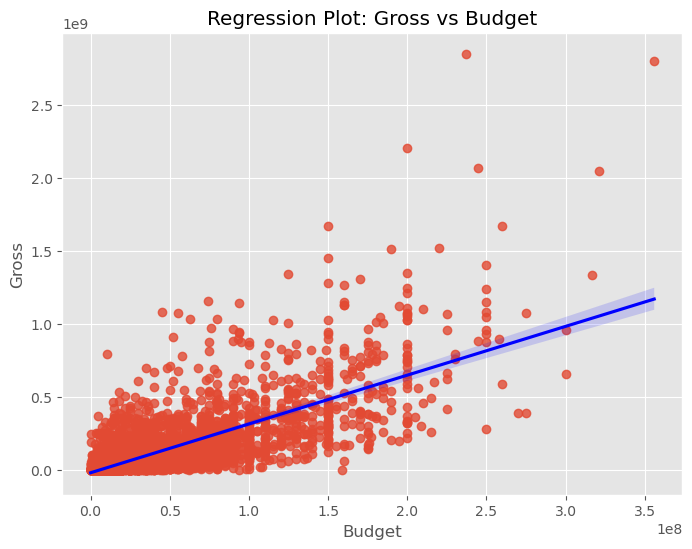

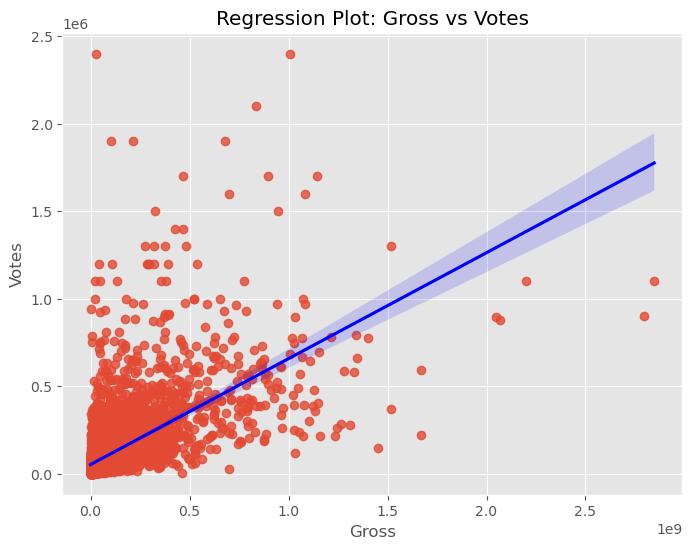

In [14]:
# We can see that there is high correlation between gross and budget, gross and votes
plt.figure(figsize=(8,6))
sns.regplot(x='budget',y='gross', data=df, line_kws={"color": "blue"})

plt.title('Regression Plot: Gross vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x='gross',y='votes', data=df, line_kws={"color": "blue"})

plt.title('Regression Plot: Gross vs Votes')
plt.xlabel('Gross')
plt.ylabel('Votes')
plt.grid(True)
plt.show()